# Linear Regression without regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = [[2, 1, 3], [7, 1, 9], [1, 8, 1], [3, 7, 4]]
y = [[2], [5], [5], [6]]

###  Gradient Descent

In [3]:
def costFuction(X, y, theta):
    '''Mean Square Error'''
    X = np.array(X)
    y = np.array(y)
    m = y.size
    
    pred = X.dot(theta).reshape(-1, 1)
    return np.sum((y - pred)**2) / m

In [4]:
custom_MSE_val = costFuction(X, y, [[1],[2],[3]])

In [5]:
from sklearn.metrics import mean_squared_error
X_test = np.array(X).dot([1,2,3])
sklearn_MSE_val = mean_squared_error(y, X_test)

In [6]:
custom_MSE_val == sklearn_MSE_val

True

In [7]:
def gradientDescent(X, y, theta=np.zeros(len(X[0])), alpha=0.01, num_iters=10):
    X = np.array(X)
    y = np.array(y)
    theta = np.array(theta)
    
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        ho = X.dot(theta).reshape(-1, 1)
        theta = theta - ((ho-y).T.dot(X) * (alpha/m)).T
        J_history[iter] = costFuction(X, y, theta)
        
    return(J_history, theta)

In [8]:
n_iter = 100
J_history, theta = gradientDescent(X, y, [[0.1], [-0.2], [0.3]], 0.01, n_iter)
print('Theta:\n',theta)
print('MSE :', J_history[-1])

Theta:
 [[0.15891122]
 [0.56622552]
 [0.37177637]]
MSE : 0.00238313876362449


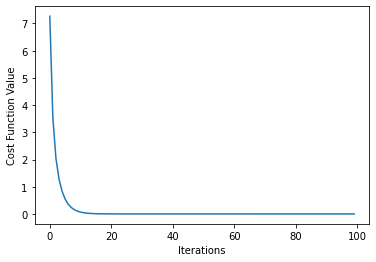

In [9]:
plt.plot(J_history)
plt.ylabel('Cost Function Value')
plt.xlabel('Iterations');

## Normal Equation

In [10]:
def normalEquation(X, y):
    X = np.array(X)
    y = np.array(y)

    return np.linalg.inv(X.T @ X) @ X.T @ y

In [11]:
costFuction(X, y, normalEquation(X,y))

0.001572327044025163

## Load test sample visualize and compare with sklearn

In [12]:
data = np.loadtxt('sample-data.txt', delimiter=',')

In [13]:
X = np.c_[np.ones(data.shape[0]), data[:,:-1] ]

In [14]:
y = data[:,-1].reshape(-1, 1)

### Plotting the Data

Text(0, 0.5, 'Rent Price $')

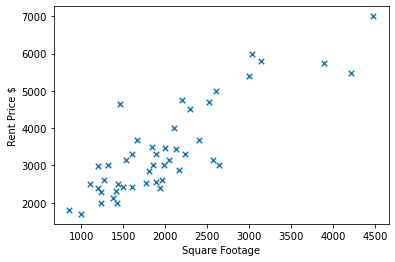

In [15]:
plt.scatter(X[:,1], y, s=30, alpha=1, marker='x')
plt.xlabel("Square Footage")
plt.ylabel("Rent Price $")

Text(0, 0.5, 'Price $')

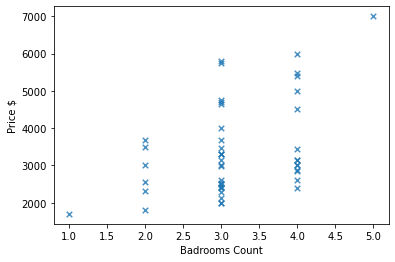

In [16]:
plt.scatter(X[:,2], y, s=30, alpha=0.8, marker='x')
plt.xlabel("Badrooms Count")
plt.ylabel("Price $")

In [17]:
concat_data = np.c_[X[:,1:], y]

In [18]:
df = pd.DataFrame(concat_data, columns=["SquareFootage", "BadroomsCount", "RentPrice"])

In [19]:
df.head()

,SquareFootage,BadroomsCount,RentPrice
0,2104.0,3.0,3999.0
1,1600.0,3.0,3299.0
2,2400.0,3.0,3690.0
3,1416.0,2.0,2320.0
4,3000.0,4.0,5399.0


In [20]:
df.shape

(47, 3)

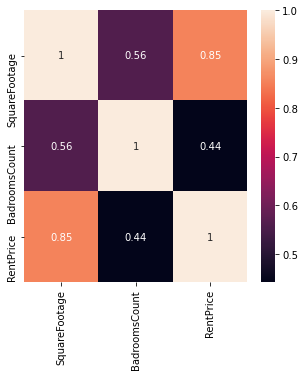

In [21]:
corr_matrix = pd.DataFrame(df).corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [23]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
reg_model = linear_regressor.fit(X_train[:,1:], y_train)

In [24]:
custom_coef = normalEquation(X_train, y_train)

In [25]:
predicted_values = X_test.dot(custom_coef)

In [26]:
mse_custom = "%.2f" % mean_squared_error(y_test, X_test.dot(custom_coef))

In [27]:
mse_sklearn = "%.2f" % mean_squared_error(y_test, reg_model.predict(X_test[:,1:]))

In [28]:
mse_custom, mse_sklearn

('1047162.17', '1047162.17')

In [29]:
mse_custom == mse_sklearn 

True

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE) 

RMSE = 1023.309 
MSE = 1047162.1688200997 
MAE = 804.5328751812152
